<a href="https://colab.research.google.com/github/cauancalmeida/Challenge_1/blob/main/Analise_descritiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = requests.get('https://raw.githubusercontent.com/cauancalmeida/Challenge_1/refs/heads/main/Alura-Voz-limpo.json')
df = pd.read_json(df.text)
df

<ipython-input-3-7dd029b16783>:2: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(df.text)


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7039,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7040,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7041,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [4]:
df.rename(columns={'internet.TechSupport':'internet_TechSupport','internet.DeviceProtection':'internet_DeviceProtection','internet.OnlineBackup':'internet_OnlineBackup','internet.OnlineSecurity':'internet_OnlineSecurity', 'customer.tenure':'tenure','customer.Dependents':'Dependents','customer.SeniorCitizen':' SeniorCitizen','customer.Partner':'Partner','customer.gender':'gender','phone.PhoneService':'phone_PhoneService','phone.MultipleLines':'phone_MultipleLines','internet.InternetService':'internet_InternetService',
                   'account.Contract':'account_Contract',
                  'account.PaperlessBilling':'account_PaperlessBilling','account.PaymentMethod':'account_PaymentMethod',
                  'account.Charges.Monthly':'account_Charges_Monthly','account.Charges.Total':'account_Charges_Total'},inplace=True)
df.columns

Index(['customerID', 'Churn', 'gender', ' SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'phone_PhoneService', 'phone_MultipleLines',
       'internet_InternetService', 'internet_OnlineSecurity',
       'internet_OnlineBackup', 'internet_DeviceProtection',
       'internet_TechSupport', 'internet.StreamingTV',
       'internet.StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges_Monthly', 'account_Charges_Total'],
      dtype='object')

In [5]:
df.describe()

,SeniorCitizen,tenure,account_Charges_Monthly,account_Charges_Total
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.798992
std,0.368612,24.559481,30.090047,2266.730170
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


variavel Churn não foi retornada, farei um dtypes para entender

In [6]:
df.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
phone_PhoneService,object
phone_MultipleLines,object
internet_InternetService,object


neste caso, basta incluir um metodo include no descibe

In [7]:
df.describe(include='object')

,customerID,Churn,gender,Partner,Dependents,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet.StreamingTV,internet.StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,0002-ORFBO,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,1,5174,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


ainda esta um pouco complicado, passarei para abordagem grafica

In [8]:
df.Churn.value_counts()

,count
Churn,
No,5174
Yes,1869


#Analise grafica

<BarContainer object of 2 artists>

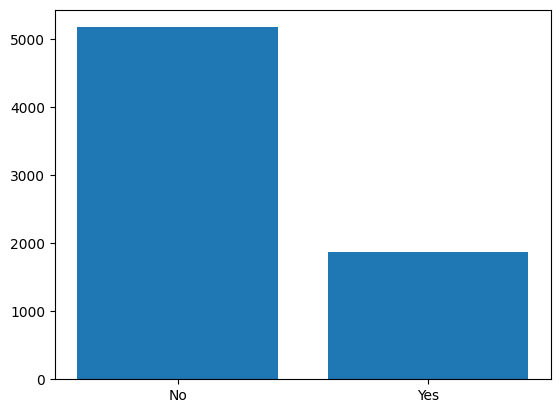

In [9]:
plt.bar(df.Churn.unique(),df.Churn.value_counts())

Analise por genero

<Axes: xlabel='gender', ylabel='count'>

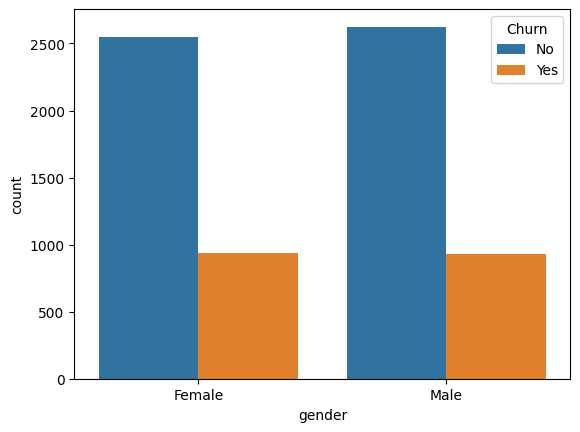

In [19]:
sns.countplot(df, x='gender', hue='Churn')

<Axes: xlabel='Dependents', ylabel='count'>

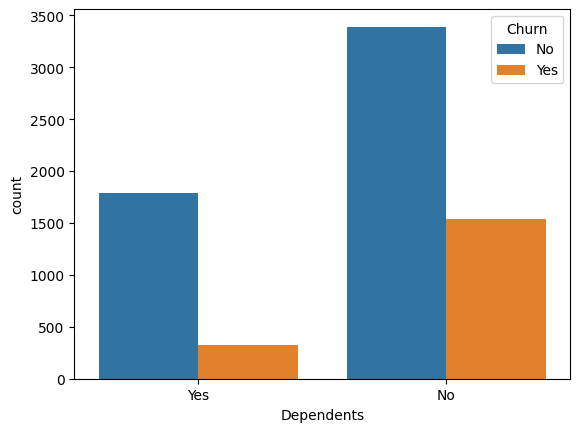

In [18]:
sns.countplot(df, x='Dependents', hue='Churn')

Nestes casos, podemos ver que o genero ou ter dependentes não tem grandes impactos para o Churn

<Axes: xlabel='phone_MultipleLines', ylabel='count'>

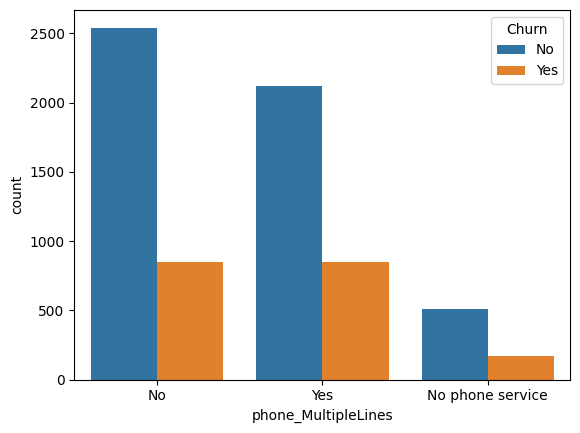

In [22]:
sns.countplot(df, x='phone_MultipleLines', hue='Churn')

Aparentemente ter multiplas linhas, ou se quer ter linhas telefonicas não tem um grande impacto para o Churn

<Axes: xlabel='internet_InternetService', ylabel='count'>

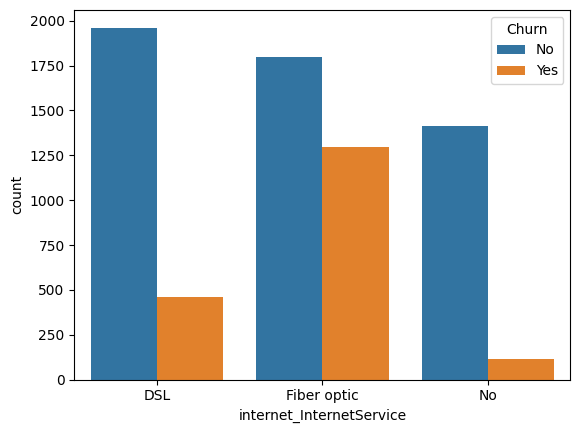

In [21]:
sns.countplot(df, x='internet_InternetService', hue='Churn')

Como apresentado acima, os cliente que tem fibra otica, parecem ter uma taxa de cancelamento maior que os outros tipos de conexão

<Axes: xlabel='internet_OnlineBackup', ylabel='count'>

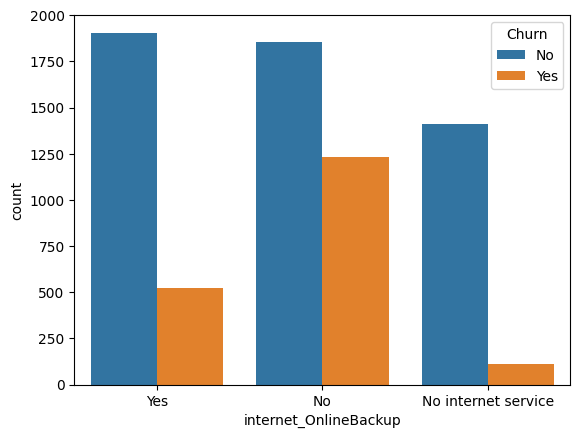

In [26]:
sns.countplot(df, x='internet_OnlineBackup', hue='Churn')

<Axes: xlabel='internet_OnlineSecurity', ylabel='count'>

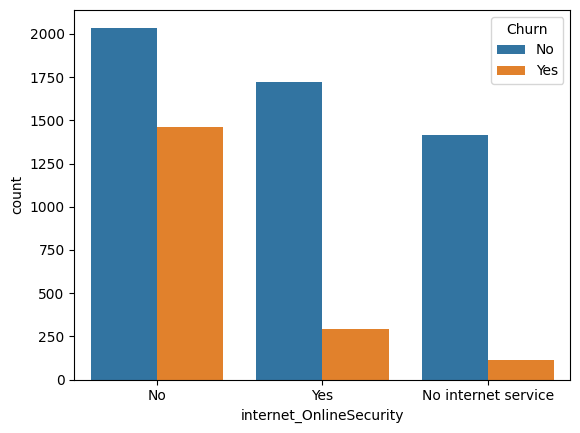

In [27]:
sns.countplot(df, x='internet_OnlineSecurity', hue='Churn')


<Axes: xlabel='internet_DeviceProtection', ylabel='count'>

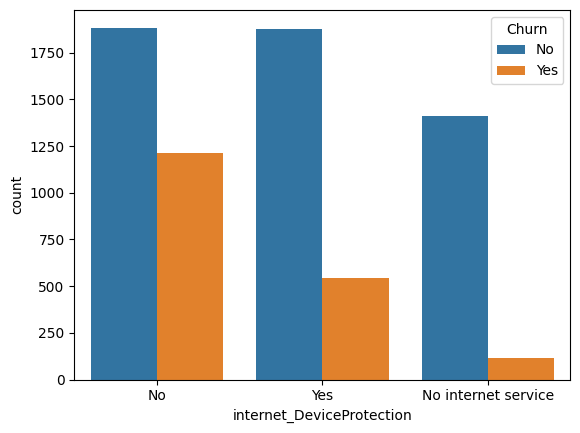

In [28]:
sns.countplot(df, x='internet_DeviceProtection', hue='Churn')


<Axes: xlabel='internet_TechSupport', ylabel='count'>

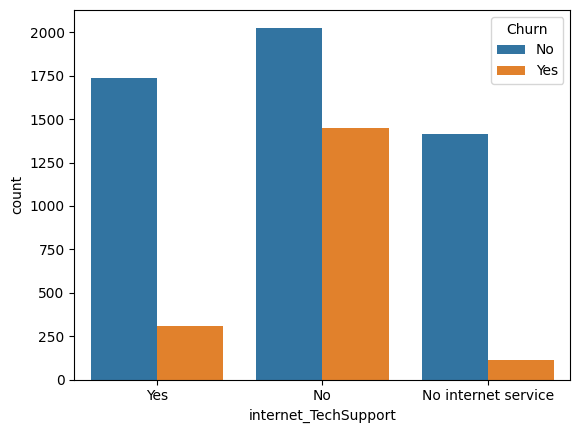

In [29]:
sns.countplot(df, x='internet_TechSupport', hue='Churn')

Ter o serviço de suporte parece impactar no Churn. Talvez seja necessario dar uma revisada no serviço de suporte.

<Axes: xlabel='account_Contract', ylabel='count'>

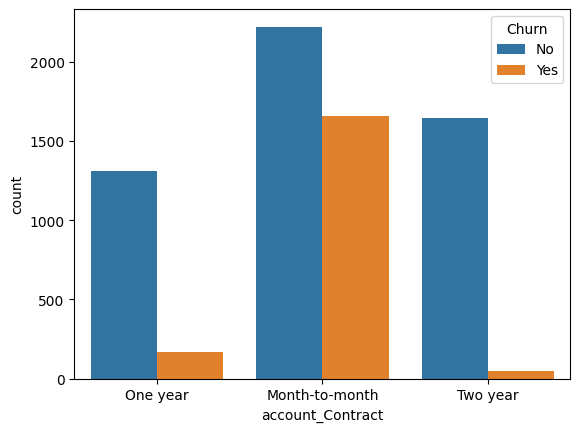

In [30]:
sns.countplot(df, x='account_Contract', hue='Churn')

<Axes: xlabel='account_PaymentMethod', ylabel='count'>

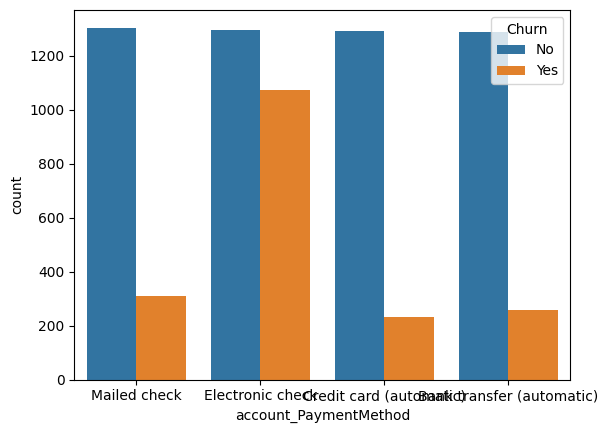

In [52]:
sns.countplot(df, x='account_PaymentMethod', hue='Churn',orient='y')

Os metodos de pagamento eletronico mensais parecem ter maior impacto no Churn

<Axes: xlabel=' SeniorCitizen', ylabel='count'>

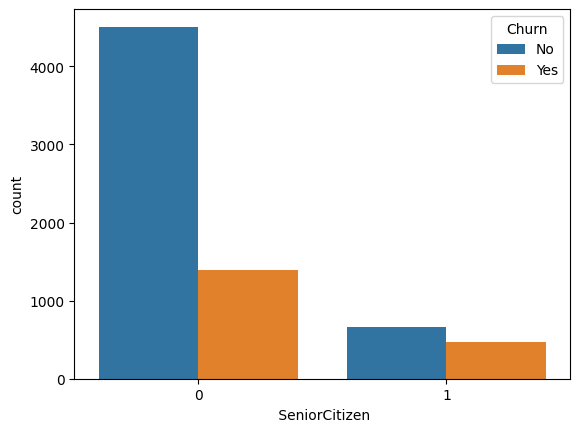

In [67]:
sns.countplot(df, x=' SeniorCitizen', hue='Churn')

aparentemente quem tem mais cancelamentos é quem tem menos idade

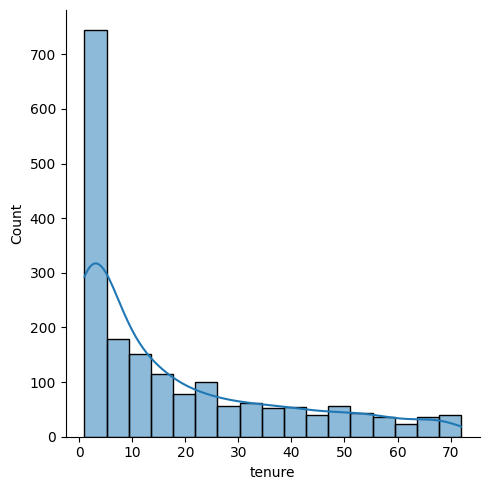

In [68]:
sns.displot(df.query('Churn == "Yes"'), x='tenure', kde=True)

Vemos acima, que quem tem menos tempo de contrato, é quem tem uma maior probabilidade de cancelar o serviço.

<Axes: xlabel='tenure', ylabel='Churn'>

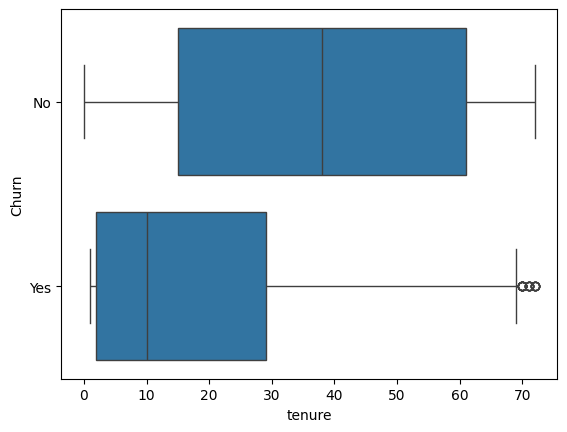

In [71]:
sns.boxplot(df, x='tenure', y='Churn')

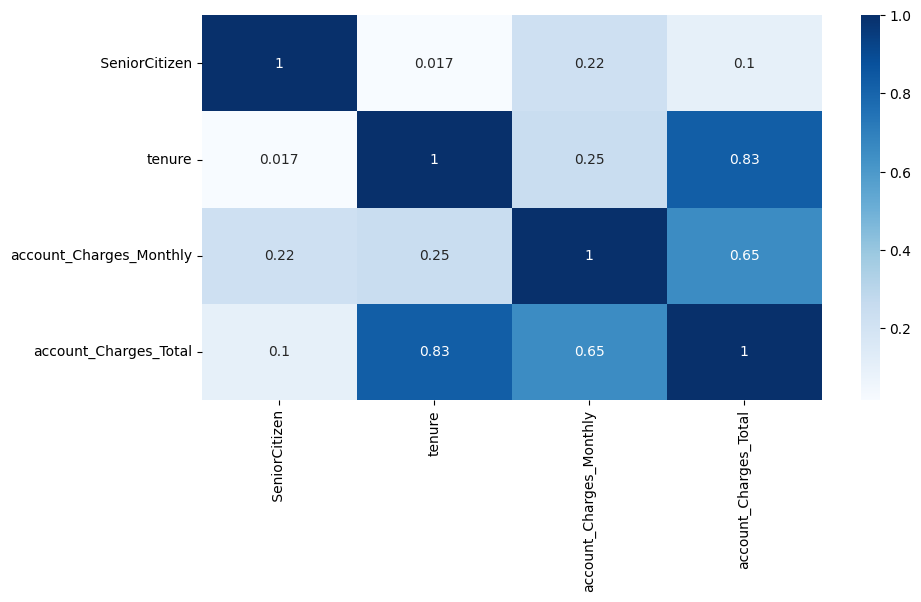

In [70]:
#grafico de calor para verificar a correlação entre as variaveis
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.show()